# Assignment - 5

## Data - Preprocessing

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv("city_day.csv")

In [199]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [203]:
df.isna().sum() / len(df)

City          0.000000
Date          0.000000
PM2.5         0.155701
PM10          0.377231
NO            0.121296
NO2           0.121398
NOx           0.141715
NH3           0.349734
CO            0.069723
SO2           0.130507
O3            0.136196
Benzene       0.190410
Toluene       0.272290
Xylene        0.613220
AQI           0.158511
AQI_Bucket    0.158511
dtype: float64

In [205]:
missing_values = df.isna().sum()

In [207]:
# to find the sum of all missing values
sum = 0;
for i in missing_values:
    sum = sum + i
sum

88488

The dataset contains 88488 missing values out of 16*29531 = 472496 which is almost 18 percent of the total data.

<Axes: >

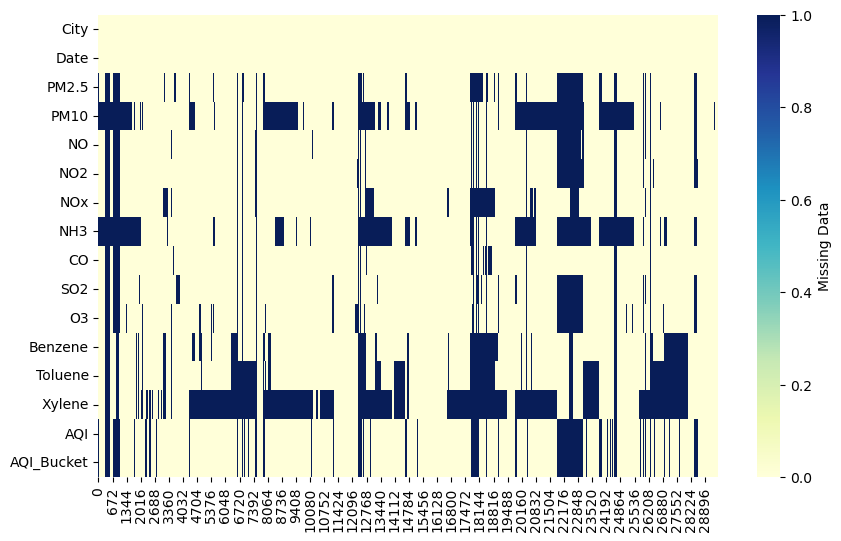

In [210]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isna().transpose(),
           cmap = "YlGnBu",
           cbar_kws = {'label': 'Missing Data'})

From the above heatmap we can see that Xylene column contains 61% missing values so we can drop that column and handle other missing values using mean or median.

In [233]:
new_data = df.drop(['Xylene'], axis = 1)

In [235]:
new_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory


In [237]:
# Function to fill the missing values with median
def data_imputation(data, column_grouping, column_selected):
    # data is the name of dataframe to be processed
    # column_grouing is column used to group and find the median
    # column_selected is column selected to fill the na values with median

    group = data[column_grouping].unique()

    for value in group:
        median = data.loc[(data[column_grouping] == value) & ~(data[column_selected].isna()), column_selected].median()
        data.loc[(data[column_grouping]==value) & (data[column_selected].isna()), column_selected] = median

    return data

In [239]:
# List of columns to impute
columns_to_impute = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

# Apply the imputation for each column grouped by 'City'
for column in columns_to_impute:
    new_data = data_imputation(new_data, column_grouping='City', column_selected=column)

In [240]:
# Function to impute categorical data using the mode
def categorical_imputation(data, column_grouping, column_selected):
    group = data[column_grouping].unique()
    for value in group:
        # Compute the mode for non-missing values within each group
        mode = data.loc[(data[column_grouping] == value) & ~(data[column_selected].isna()), column_selected].mode()
        if not mode.empty:
            # Fill missing values with the mode
            data.loc[(data[column_grouping] == value) & (data[column_selected].isna()), column_selected] = mode[0]
    return data

new_data = categorical_imputation(new_data, column_grouping='City', column_selected='AQI_Bucket')

# Check the result
new_data['AQI_Bucket'].isna().sum()  # Should return 0 if all missing values were imputed

0

In [243]:
new_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,58.37,107.96,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,384.5,Severe
1,Ahmedabad,2015-01-02,58.37,107.96,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,384.5,Severe
2,Ahmedabad,2015-01-03,58.37,107.96,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,384.5,Severe
3,Ahmedabad,2015-01-04,58.37,107.96,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,384.5,Severe
4,Ahmedabad,2015-01-05,58.37,107.96,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,384.5,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory


In [248]:
outliers = new_data

# from scipy import stats
# Calculate Z-scores for a specific column (e.g., 'PM2.5')
outliers['z_score'] = stats.zscore(new_data['PM2.5'])

# Identify outliers (absolute Z-score > 3)
outliers_z = outliers[abs(outliers['z_score']) > 3]
outliers_z

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,z_score
667,Ahmedabad,2016-10-29,381.69,107.96,29.49,25.41,54.90,NaN,29.49,49.33,15.74,13.10,28.16,472.0,Severe,5.250026
669,Ahmedabad,2016-10-31,271.85,107.96,16.39,15.28,31.68,NaN,16.39,33.31,41.24,3.52,8.61,721.0,Severe,3.432018
1280,Ahmedabad,2018-07-04,302.08,107.96,27.20,28.10,34.00,NaN,27.20,46.94,0.88,5.26,43.43,440.0,Severe,3.932368
3141,Amritsar,2017-05-06,296.84,138.35,13.41,16.92,27.72,30.49,0.00,15.32,15.81,3.19,2.06,117.0,Moderate,3.845638
3143,Amritsar,2017-05-08,868.66,116.29,13.21,16.46,27.72,30.05,0.00,27.92,15.99,3.19,2.06,110.0,Moderate,13.310068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25730,Shillong,2019-09-04,274.92,368.06,1.28,3.63,1.44,3.66,0.28,5.14,19.11,0.26,1.42,48.0,Good,3.482831
26106,Talcher,2018-03-04,283.31,488.72,173.68,36.38,185.73,28.93,3.30,52.69,30.91,0.00,0.00,484.0,Severe,3.621698
26122,Talcher,2018-03-20,331.81,382.08,140.16,43.96,184.13,25.29,3.34,4.21,36.52,0.00,0.00,128.5,Moderate,4.424441
26797,Talcher,2020-01-24,342.42,434.27,19.21,7.29,19.00,1.78,1.45,10.28,28.36,0.00,0.00,128.5,Moderate,4.600052


OUTLIERS USING Z-SCORE = 614

In [250]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = outliers['PM2.5'].quantile(0.25)
Q3 = outliers['PM2.5'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = outliers[(outliers['PM2.5'] < (Q1 - 1.5 * IQR)) | (outliers['PM2.5'] > (Q3 + 1.5 * IQR))]
outliers_iqr

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,z_score
32,Ahmedabad,2015-02-02,178.33,107.96,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,914.0,Severe,1.884130
44,Ahmedabad,2015-02-14,177.33,107.96,37.49,47.58,77.85,NaN,37.49,99.72,36.47,17.00,52.66,761.0,Severe,1.867579
51,Ahmedabad,2015-02-21,239.96,107.96,61.95,46.25,106.92,NaN,61.95,84.87,33.55,22.14,53.98,1141.0,Severe,2.904194
53,Ahmedabad,2015-02-23,238.41,107.96,77.70,55.07,131.32,NaN,77.70,89.07,37.30,50.61,163.64,1247.0,Severe,2.878539
63,Ahmedabad,2015-03-05,173.01,107.96,48.44,42.27,90.73,NaN,48.44,78.76,59.39,9.72,9.96,780.0,Severe,1.796077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26821,Talcher,2020-02-17,159.45,265.74,9.52,4.76,13.42,1.40,1.97,29.09,37.18,0.00,0.00,322.0,Very Poor,1.571639
28631,Visakhapatnam,2018-01-14,199.94,283.00,36.34,62.91,62.89,27.20,2.11,14.33,37.74,5.08,7.05,334.0,Very Poor,2.241806
28929,Visakhapatnam,2018-11-08,198.38,196.15,25.58,41.63,42.95,10.07,0.73,19.32,43.18,5.24,11.26,387.0,Very Poor,2.215986
28996,Visakhapatnam,2019-01-14,203.05,306.16,20.25,80.39,59.22,16.24,1.71,36.83,83.48,5.91,8.06,343.0,Very Poor,2.293281


OUTLIERS USING IQR = 2234

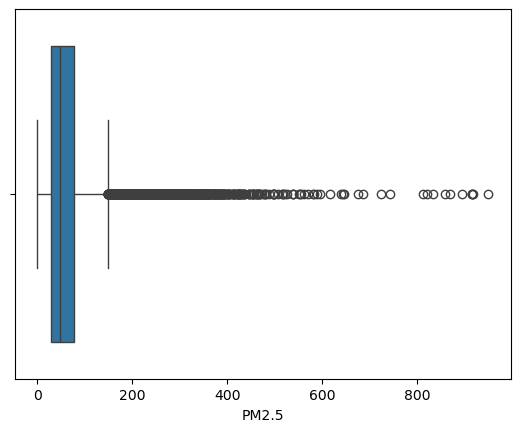

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers in the 'PM2.5' column
sns.boxplot(x=outliers['PM2.5'])
plt.show()


In [254]:
# Function to apply IQR-based capping (cap and floor method) to handle outliers
def cap_and_floor_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values below the lower bound and above the upper bound
    data[column] = data[column].clip(lower_bound, upper_bound)
    
    return data

# Numerical columns to check and apply capping
numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

# Apply capping for each column
for column in numerical_columns:
    new_data = cap_and_floor_outliers(new_data, column)

# After applying the cap and floor method, you can inspect the data summary:
print(new_data.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  27522.000000  29531.000000  29531.000000  28362.000000   
mean      58.498269    106.051293     15.270978     26.770733     29.345133   
std       38.898551     57.422609     12.698584     18.686870     21.199750   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.080000     59.960000      6.100000     12.080000     13.980000   
50%       48.170000    100.685000     10.580000     21.460000     24.290000   
75%       76.345000    130.060000     22.220000     36.650000     39.510000   
max      148.742500    235.210000     46.400000     73.505000     77.805000   

                NH3            CO           SO2            O3       Benzene  \
count  27522.000000  29531.000000  29531.000000  29369.000000  26799.000000   
mean      20.602428      1.118912     12.363020     33.128859      1.915645   
std       14.378396      0.865943      8.445002    